# Rodamap

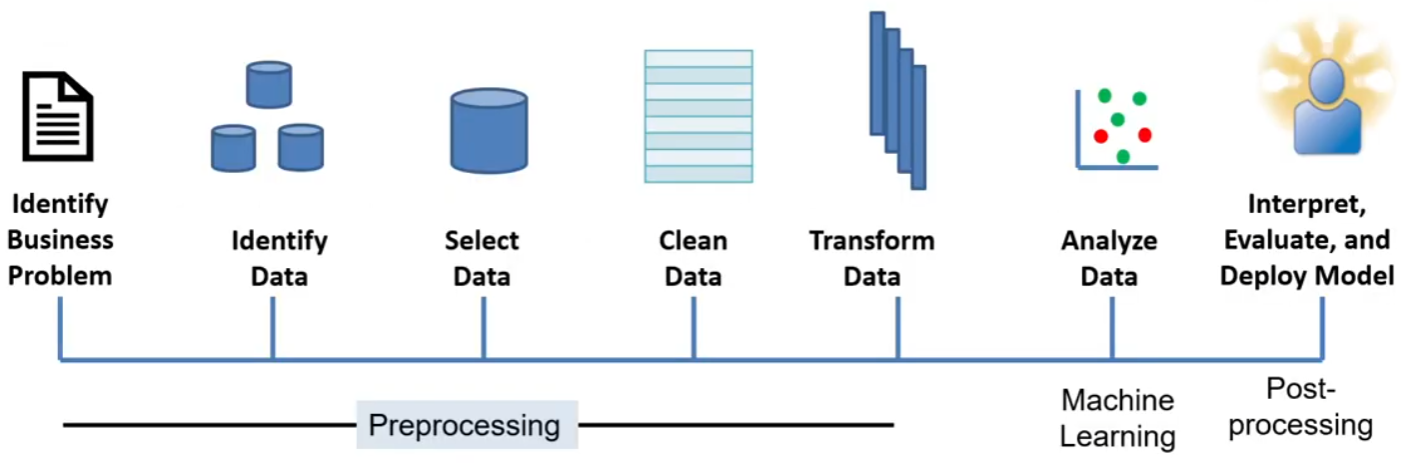

## Exploratory data analysis
- 1. How does the data look like?
- 2. Does our dataset contain any missing values? If so, we need to either remove them or apply an appropriate imputation method.
- 3. What is the distribution of our target variable?
- 4. Review each original feature one by one to determine which features should be retained and which new features can be derived from them.

In [1]:
import pandas as pd
df = pd.read_csv('dataset_case_study.csv')
print(f'Data shape: {df.shape}')
df.head()

Data shape: (79557, 17)


,transaction_id,creation_date,ip_id,credit_card_id,booker_country,card_issuing_country,hotel_country,hotel_id,language,price_euro,book_window,length_of_stay,email_id,email_domain,auth_result,property_age,payment_method
0,922278674,2022-01-07,e1fcad6672daa92bd6b5020fd954ff5a,0bb5ba2d7dd11cd0cf12f6db8fba25b0,Germany,Germany,Germany,90084,German,3478.16,89,5,9dfb54bfcfeebaffb4774a374d1a52dc,@strawberry.com,AUTHORISED,30,mastercard
1,819686771,2022-01-22,5a71be20c6d46f2393be71d7199b607e,bb01aa67b20f28b8ce29e3a60d8ab276,Iceland,Iceland,Bulgaria,56417,Icelandic,2476.98,30,13,cc6996a700b82b759c87d0b2ddf64611,@grapefruit.com,AUTHORISED,28,visa
2,755157875,2022-01-09,c25608c42c31aeafa1d7ad8012906b3c,09f5288f5bdd02b54c38825d1c29f5c9,Norway,Norway,Norway,22278,Slovak,2855.06,68,17,eda9797a55551a5b8006bbee110b44a7,@grape.com,AUTHORISED,29,mastercard
3,601281336,2022-01-17,e782033ba3a8dd86edd4f798579a0f92,288c1c58f5255956d78e2e526f9a2910,Spain,Spain,Italy,44946,Spanish,3780.31,11,17,731b84fa086015230b89780553603ea8,@blueberry.com,AUTHORISED,33,visa
4,152684295,2022-01-25,3895fc0fecfd3d4f31d7d708fc592098,95d0d8ec61b03bf7fd4250086313ab22,Germany,Germany,Norway,91658,German,2115.12,64,13,406e2e3950a284067b393d7137212f64,@lemon.com,AUTHORISED,27,paypal


- We have 16 input variables and one target variable in our raw dataset, including datetime, numerical, and categorical data types.

### 1. Does our dataset contain any missing values?

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79557 entries, 0 to 79556
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transaction_id        79557 non-null  int64  
 1   creation_date         79557 non-null  object 
 2   ip_id                 79557 non-null  object 
 3   credit_card_id        79557 non-null  object 
 4   booker_country        79557 non-null  object 
 5   card_issuing_country  79557 non-null  object 
 6   hotel_country         79557 non-null  object 
 7   hotel_id              79557 non-null  int64  
 8   language              79557 non-null  object 
 9   price_euro            79557 non-null  float64
 10  book_window           79557 non-null  int64  
 11  length_of_stay        79557 non-null  int64  
 12  email_id              79557 non-null  object 
 13  email_domain          79557 non-null  object 
 14  auth_result           79557 non-null  object 
 15  property_age       

- Luckily, we do not have any missing values, so we can proceed directly with the data analysis.

### 2. What is the distribution of our target variable?

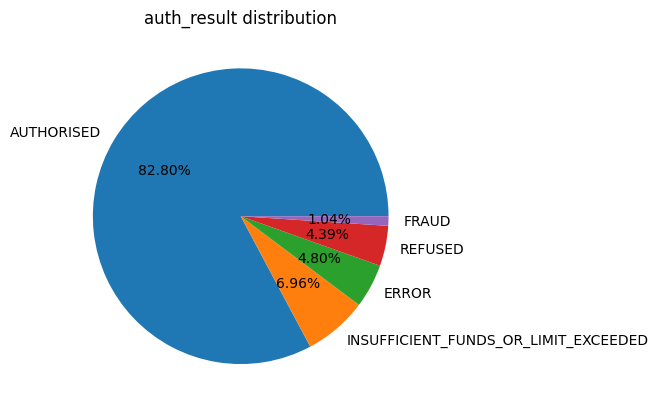

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
counts=df['auth_result'].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%')
plt.title('auth_result distribution')
plt.show()

- We can see that the majority of transactions are non-fraudulent (AUTHORISED), and only around 1% are fraudulent. Therefore, our dataset is highly imbalanced. This is one of the key characteristics and major challenges in the fraud detection domain.

### 3. Feature engineering

Review each original feature one by one to determine which features should be retained and which new features can be derived from them.

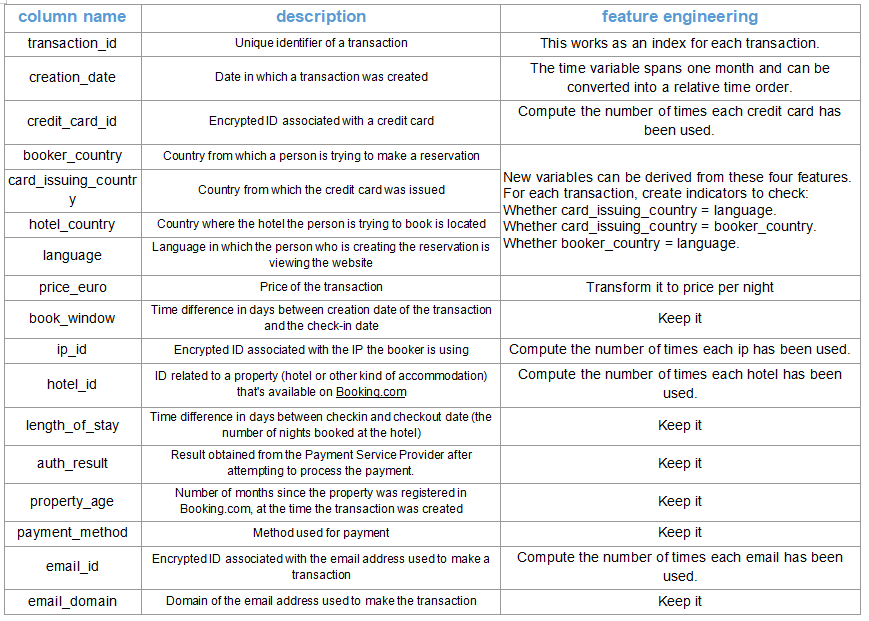

In [4]:
import numpy as np
df['creation_date'] = pd.to_datetime(df['creation_date'])
# Now calculate days since first creation
df['days_since_first'] = (df['creation_date'] - df['creation_date'].min()).dt.days
df.drop(columns='creation_date',inplace=True)

df['price_per_night']=df['price_euro']/(df['length_of_stay']+1)

df['credit_card_id_count'] = df.groupby('credit_card_id')['credit_card_id'].transform('count')
df['ip_id_count'] = df.groupby('ip_id')['ip_id'].transform('count')
df['email_id_count'] = df.groupby('email_id')['email_id'].transform('count')
df['hotel_id_count'] = df.groupby('hotel_id')['hotel_id'].transform('count')

lang_to_country = {
    'German': 'Germany',
    'Icelandic': 'Iceland', 
    'Slovak': 'Slovakia',
    'Spanish': 'Spain',
    'Norwegian': 'Norway',
    'Luxembourgish': 'Luxembourg',
    'Hungarian': 'Hungary',
    'Italian': 'Italy',
    'Danish': 'Denmark',
    'Swedish': 'Sweden',
    'French': 'France', 
    'Dutch': 'Netherlands',
    'Finnish': 'Finland',
    'Bulgarian': 'Bulgaria',
    'Maltese': 'Malta'}
df['language']=df['language'].map(lang_to_country)

df['language_flag1']=np.where(df['card_issuing_country']!=df['language'],1,0)
df['language_flag2']=np.where(df['card_issuing_country']!=df['booker_country'],1,0)
df['language_flag3']=np.where(df['language']!=df['booker_country'],1,0)

In [5]:
# Only keep the features that we are interested in.
df.drop(columns=['booker_country', 'card_issuing_country', 'hotel_country', 'language','transaction_id','ip_id','credit_card_id','hotel_id','email_id'],inplace=True)
df.head()

,price_euro,book_window,length_of_stay,email_domain,auth_result,property_age,payment_method,days_since_first,price_per_night,credit_card_id_count,ip_id_count,email_id_count,hotel_id_count,language_flag1,language_flag2,language_flag3
0,3478.16,89,5,@strawberry.com,AUTHORISED,30,mastercard,6,579.693333,1,1,1,3,0,0,0
1,2476.98,30,13,@grapefruit.com,AUTHORISED,28,visa,21,176.927143,1,1,1,1,0,0,0
2,2855.06,68,17,@grape.com,AUTHORISED,29,mastercard,8,158.614444,1,1,1,1,1,0,1
3,3780.31,11,17,@blueberry.com,AUTHORISED,33,visa,16,210.017222,1,1,1,1,0,0,0
4,2115.12,64,13,@lemon.com,AUTHORISED,27,paypal,24,151.080000,1,1,1,1,0,0,0


### 4. Variable distribution

Explore the distribution of each variable separately for each target group to understand how features differ between fraudulent and non-fraudulent transactions.

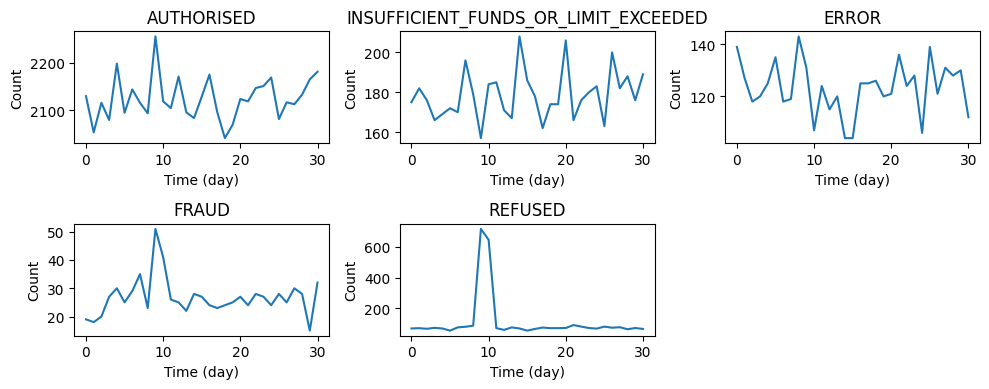

In [6]:
plt.figure(figsize=(10,4))
k=1
for i in df['auth_result'].unique():
    plt.subplot(2,3,k)
    frauds_per_step=df[df['auth_result']==i]['days_since_first'].value_counts().sort_index()
    plt.plot(frauds_per_step.index, frauds_per_step.values,label='Frauds per step')
    plt.xlabel('Time (day)')
    plt.ylabel('Count')
    plt.title(i)
    k=k+1
plt.tight_layout()
plt.show()

- This shows the daily transaction amounts of each target group.
- We can see a sudden spike in transaction amounts around day 9 for AUTHORISED, FRAUD and REFUSED groups. The other two goups do not exhibit any unusual trends.

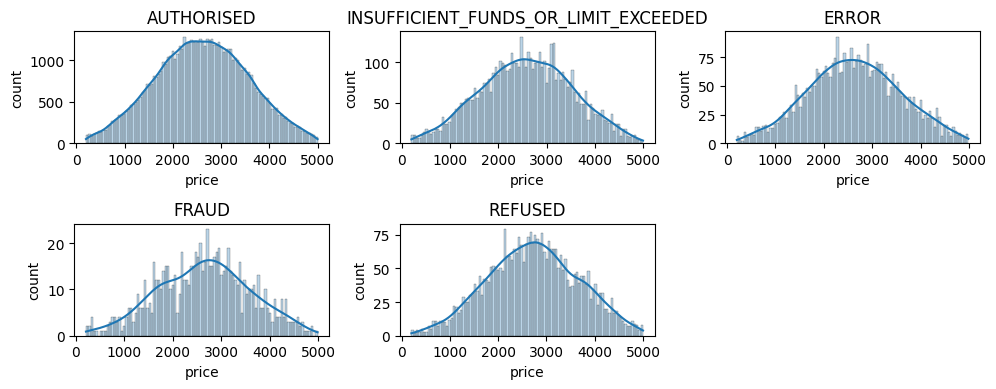

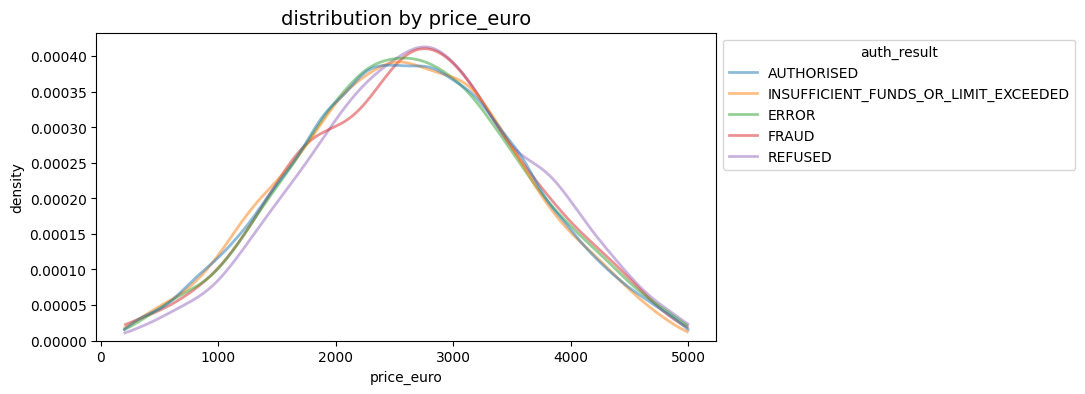

In [7]:
plt.figure(figsize=(10,4))
k=1
for i in df['auth_result'].unique():
    plt.subplot(2,3,k)
    df1=df[df['auth_result']==i]
    sns.histplot(df1['price_euro'],bins=100,kde=True, alpha=0.3)
    plt.title(i)
    plt.xlabel('price')
    plt.ylabel('count')
    k=k+1
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
# Use kdeplot instead of histplot - no bins at all
ax=sns.kdeplot(data=df, x='price_euro', hue='auth_result', alpha=0.5, linewidth=2, common_norm=False,cut=0)
plt.title('distribution by price_euro', fontsize=14)
plt.xlabel('price_euro')
plt.ylabel('density')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

- This chart shows the price distribution for each group.
- The probability density functions indicate that there is almost no difference across groups.
- This suggests that the price variable may not be an effective feature for distinguishing between groups or for detecting fraud.

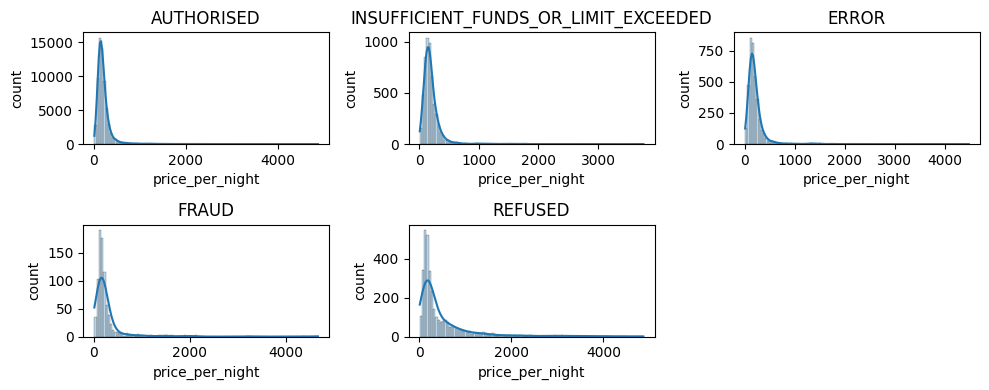

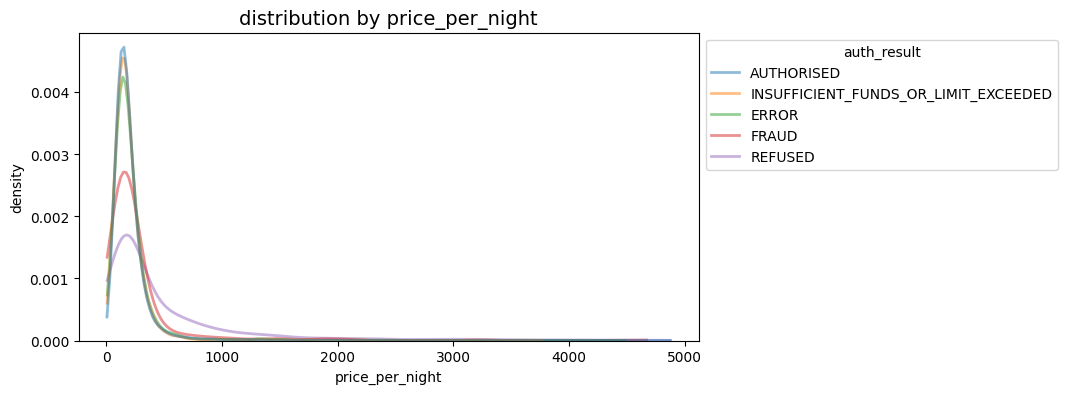

In [8]:
plt.figure(figsize=(10,4))
k=1
for i in df['auth_result'].unique():
    plt.subplot(2,3,k)
    df1=df[df['auth_result']==i]
    sns.histplot(df1['price_per_night'],bins=100,kde=True, alpha=0.3)
    plt.title(i)
    plt.xlabel('price_per_night')
    plt.ylabel('count')
    k=k+1
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
ax=sns.kdeplot(data=df, x='price_per_night', hue='auth_result', alpha=0.5, linewidth=2, common_norm=False,cut=0)
plt.title('distribution by price_per_night', fontsize=14)
plt.xlabel('price_per_night')
plt.ylabel('density')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

- This chart shows the price_per_night distribution for each group.
- The probability density functions indicate that the curves for the FRAUD and REFUSED groups differ somewhat from the other groups.
- Compared with price_euro in the raw data, this derived variable appears more informative.
- Therefore, we can retain price_per_night and remove price_euro when training analytical models later.

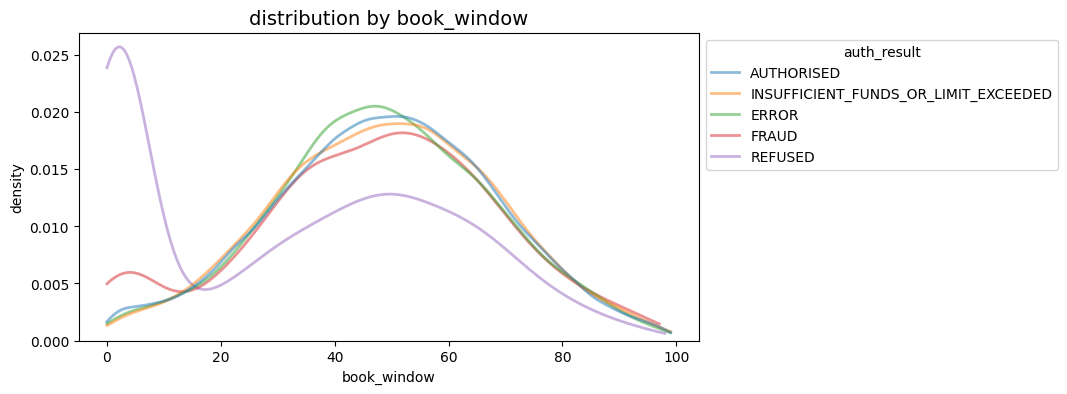

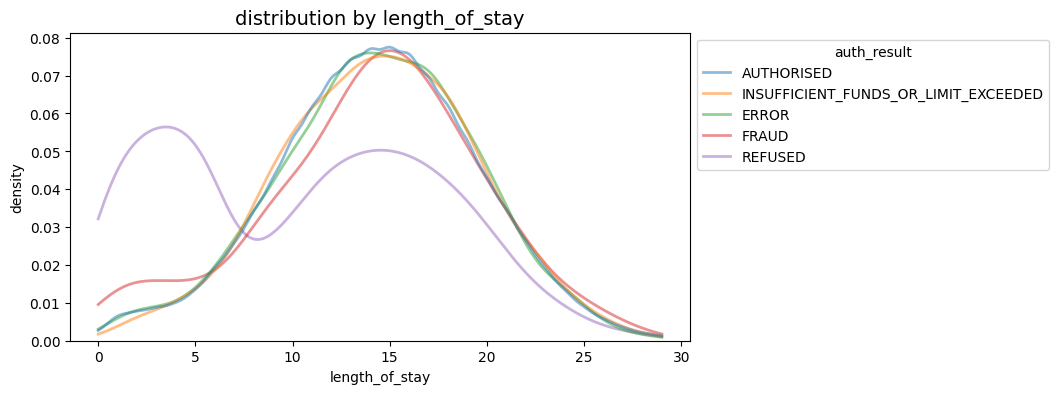

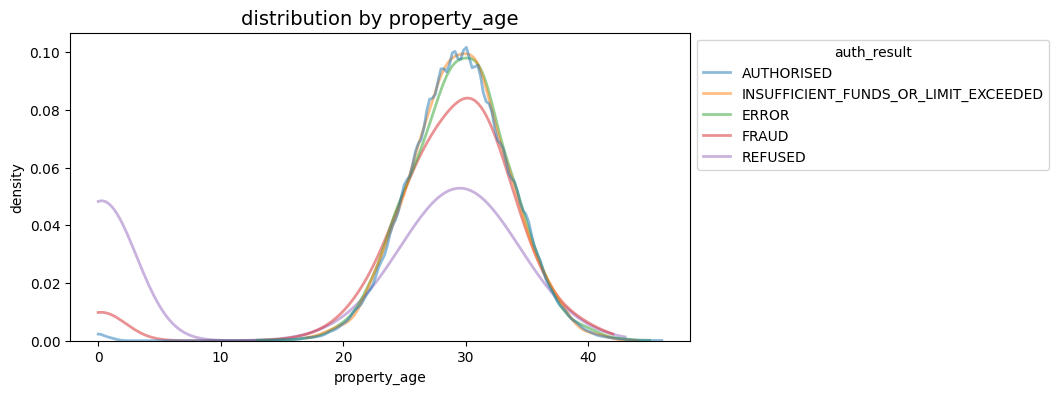

In [9]:
plt.figure(figsize=(8,4))
ax=sns.kdeplot(data=df, x='book_window', hue='auth_result', alpha=0.5, linewidth=2, common_norm=False,cut=0)
plt.title('distribution by book_window', fontsize=14)
plt.xlabel('book_window')
plt.ylabel('density')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

plt.figure(figsize=(8,4))
ax=sns.kdeplot(data=df, x='length_of_stay', hue='auth_result', alpha=0.5, linewidth=2, common_norm=False,cut=0)
plt.title('distribution by length_of_stay', fontsize=14)
plt.xlabel('length_of_stay')
plt.ylabel('density')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

plt.figure(figsize=(8,4))
ax=sns.kdeplot(data=df, x='property_age', hue='auth_result', alpha=0.5, linewidth=2, common_norm=False,cut=0)
plt.title('distribution by property_age', fontsize=14)
plt.xlabel('property_age')
plt.ylabel('density')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

- The distributions of book_window, length_of_stay, and property_age.
- The density distributions for the AUTHORISED, INSUFFICIENT_FUNDS_OR_LIMIT_EXCEEDED, and ERROR groups nearly overlap, suggesting that these groups may share similar patterns.
- The FRAUD group shows some deviation from these three groups, but the difference is not substantial.
- In contrast, the REFUSED group exhibits a clear distinction from the other groups.
- Overall, transactions in the FRAUD and REFUSED groups tend to occur with very short book_window, short length_of_stay, and smaller property_age, indicating that these transactions are often made in a rush.

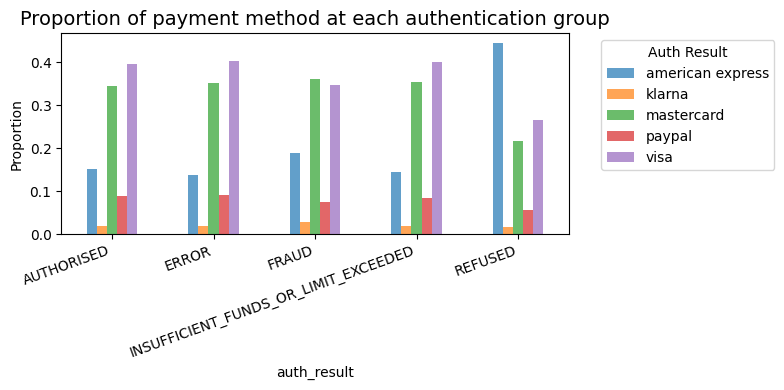

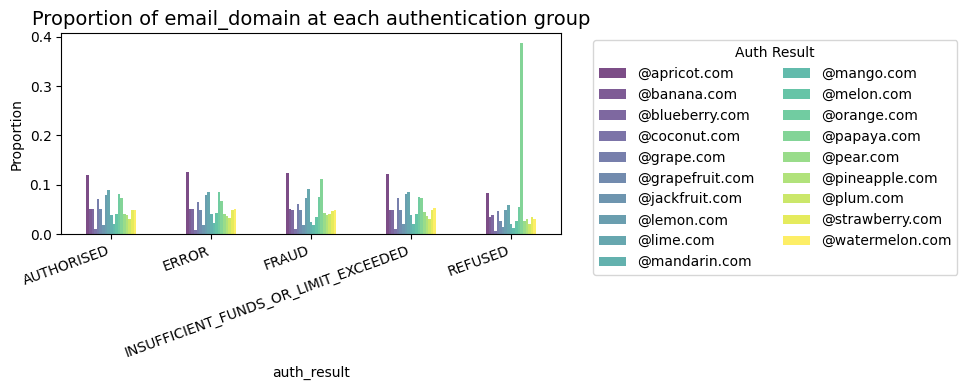

In [15]:
plt.figure(figsize=(8,4))
# Calculate proportions within each payment method
# Create a crosstab and normalize
ct = pd.crosstab(df['auth_result'], df['payment_method'], normalize='index')
ax=ct.plot(kind='bar', alpha=0.7, ax=plt.gca())
plt.title('Proportion of payment method at each authentication group', fontsize=14)
plt.ylabel('Proportion')
plt.legend(title='Auth Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
# Calculate proportions within each payment method
ct = pd.crosstab(df['auth_result'], df['email_domain'], normalize='index')
# Use a colormap for gradient colors
ax = ct.plot(kind='bar', alpha=0.7, ax=plt.gca(),colormap='viridis')  # Add colormap here
plt.title('Proportion of email_domain at each authentication group', fontsize=14)
plt.ylabel('Proportion')
plt.legend(title='Auth Result', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()

- Both payment_method and email_domain are categorical variables, so bar graphs are used for visualization.
- For payment_method, the REFUSED group deviates from the others: transactions in this group are more likely to use American Express, whereas Visa and MasterCard are more common in the other four groups.
- Regarding email_domain, the REFUSED group also shows distinct patterns, with @papaya.com being used extensively compared to the other groups.

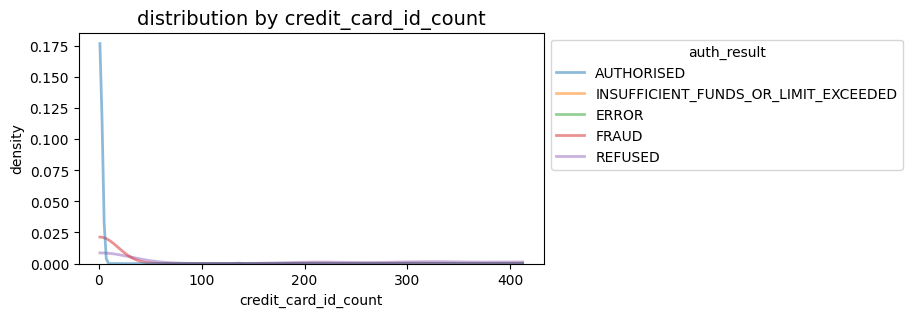

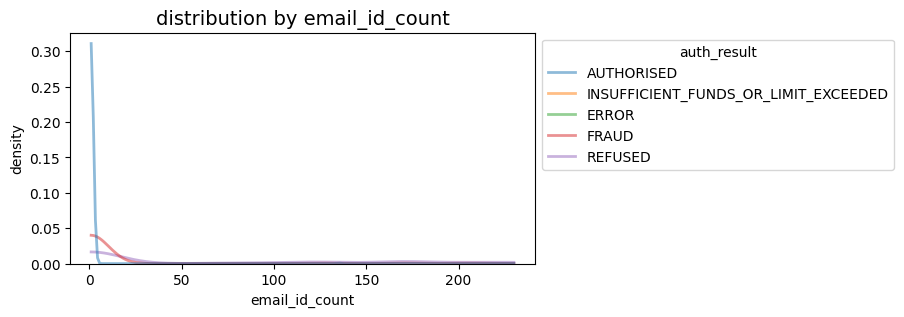

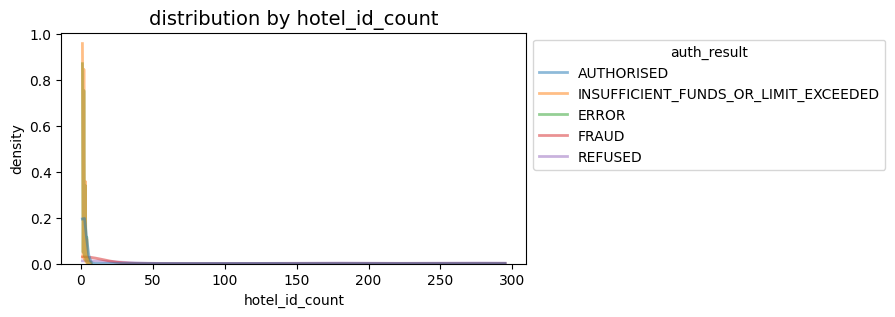

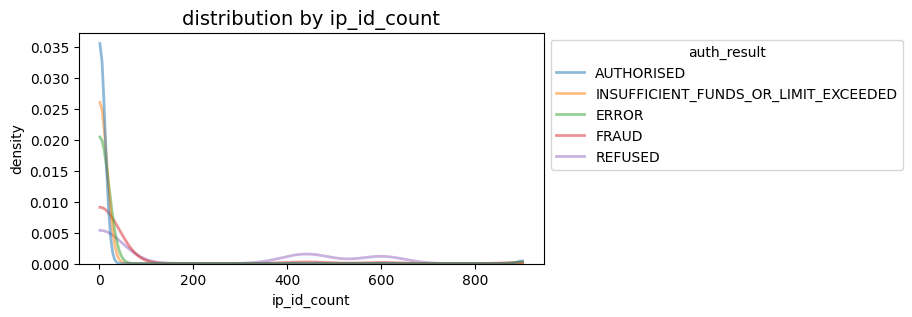

In [20]:
plt.figure(figsize=(6,3))
ax=sns.kdeplot(data=df, x='credit_card_id_count', hue='auth_result', alpha=0.5, linewidth=2, common_norm=False,cut=0,warn_singular=False)
plt.title('distribution by credit_card_id_count', fontsize=14)
plt.xlabel('credit_card_id_count')
plt.ylabel('density')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

plt.figure(figsize=(6,3))
ax=sns.kdeplot(data=df, x='email_id_count', hue='auth_result', alpha=0.5, linewidth=2, common_norm=False,cut=0,warn_singular=False)
plt.title('distribution by email_id_count', fontsize=14)
plt.xlabel('email_id_count')
plt.ylabel('density')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

plt.figure(figsize=(6,3))
ax=sns.kdeplot(data=df, x='hotel_id_count', hue='auth_result', alpha=0.5, linewidth=2, common_norm=False,cut=0)
plt.title('distribution by hotel_id_count', fontsize=14)
plt.xlabel('hotel_id_count')
plt.ylabel('density')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#ax.set_xscale('log')
plt.show()

plt.figure(figsize=(6,3))
ax=sns.kdeplot(data=df, x='ip_id_count', hue='auth_result', alpha=0.5, linewidth=2, common_norm=False,cut=0)
plt.title('distribution by ip_id_count', fontsize=14)
plt.xlabel('ip_id_count')
plt.ylabel('density')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

- Counted how many times each credit card, email address, IP address, and hotel ID was used and plotted their distributions for each target group.
- The FRAUD and REFUSED groups exhibit similar patterns, while the other three groups also share a common pattern.
- In the FRAUD and REFUSED groups, certain emails, hotels, IPs, and credit cards tend to be used repeatedly, indicating potential suspicious or high-frequency activity. 

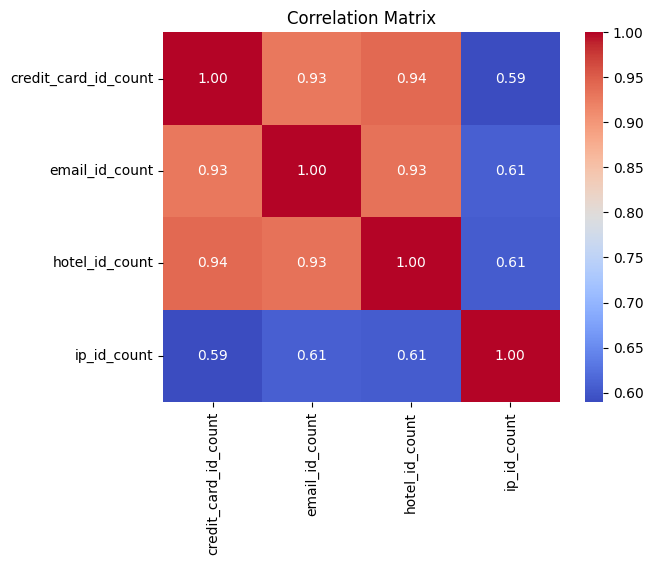

In [21]:
# Feature correlations
corr=df[['credit_card_id_count', 'email_id_count', 'hotel_id_count', 'ip_id_count']].corr()
sns.heatmap(corr,annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

- The features 'credit_card_id_count', 'email_id_count', and 'hotel_id_count' exhibit very high correlation with each other. Therefore, it may be sufficient to use only one of these three for training the analytical model, rather than including all of them.
- On the other hand, 'ip_id_count' shows relatively low correlation with the other features, likely because IP addresses can change frequently.

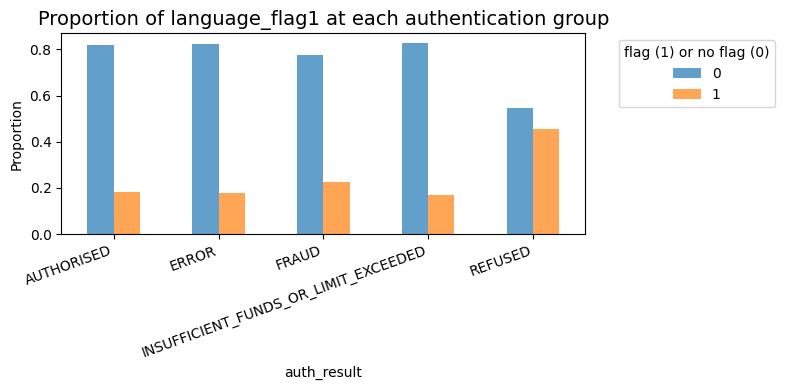

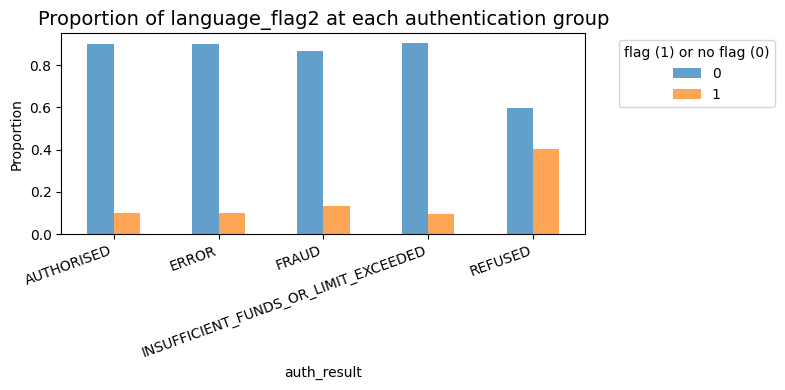

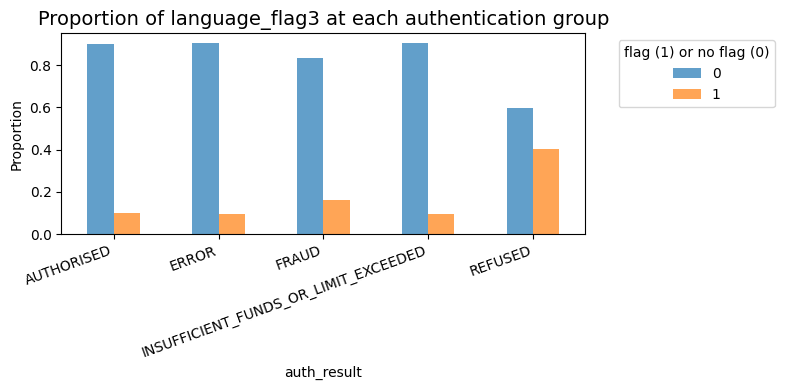

In [23]:
plt.figure(figsize=(8,4))
ct = pd.crosstab(df['auth_result'], df['language_flag1'], normalize='index')
ax=ct.plot(kind='bar', alpha=0.7, ax=plt.gca())
plt.title('Proportion of language_flag1 at each authentication group', fontsize=14)
plt.ylabel('Proportion')
plt.legend(title='flag (1) or no flag (0)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
ct = pd.crosstab(df['auth_result'], df['language_flag2'], normalize='index')
ax=ct.plot(kind='bar', alpha=0.7, ax=plt.gca())
plt.title('Proportion of language_flag2 at each authentication group', fontsize=14)
plt.ylabel('Proportion')
plt.legend(title='flag (1) or no flag (0)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
ct = pd.crosstab(df['auth_result'], df['language_flag3'], normalize='index')
ax=ct.plot(kind='bar', alpha=0.7, ax=plt.gca())
plt.title('Proportion of language_flag3 at each authentication group', fontsize=14)
plt.ylabel('Proportion')
plt.legend(title='flag (1) or no flag (0)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()

- Intuitively, when making a transaction, the language used should match the language associated with the card’s issuing country; otherwise, it may trigger a flag (language_flag1).
- Similarly, the card’s issuing country should match the booker’s country, or a flag might be raised (language_flag2).
- Likewise, the booker’s country should correspond to the language used, with mismatches flagged (language_flag3).
- The plots below show the distribution of these flags based on country (language) matches.
- As expected, our intuition holds true for most groups, but it does not apply to the REFUSED group. 

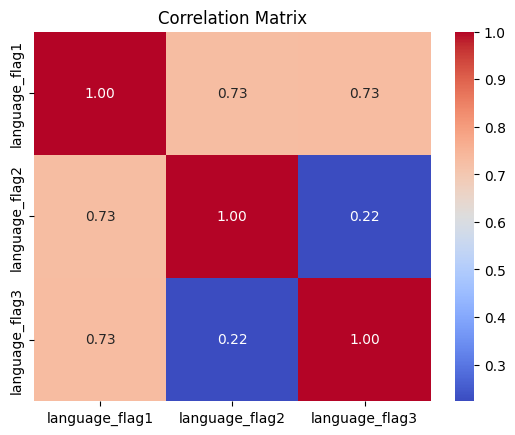

In [24]:
corr=df[['language_flag1', 'language_flag2', 'language_flag3']].corr()
sns.heatmap(corr,annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Summary

- 1. The newly proposed variables (price_per_night, language_flag1, language_flag2, language_flag3, ip_id_count, hotel_id_count, credit_card_id_count, email_id_count) appear to be effective in differentiating between the groups.

- 2. Among all features considered, the groups 'AUTHORISED', 'INSUFFICIENT_FUNDS_OR_LIMIT_EXCEEDED', and 'ERROR' exhibit nearly identical patterns, suggesting it may be reasonable to combine them into a single legitimate group.

- 3. The 'FRAUD' group shows some deviations in variable distributions compared to 'AUTHORISED', 'INSUFFICIENT_FUNDS_OR_LIMIT_EXCEEDED', and 'ERROR', but these differences are subtle. This highlights the difficulty and challenge of identifying or distinguishing 'FRAUD' transactions from the legitimate ones. We may not be able to achieve high detection accuracy with the current dataset.

- 4. The 'REFUSED' group displays distinct patterns compared with the other four groups. Transactions in this group are more likely to represent anomalies in the dataset than those in the 'FRAUD' group.